In [1]:
#Project: statistical analysis of real estate 

In [2]:
'''the rent ratio is median home price divided by 
annual median rent in the same market.
we have the following tasks:
1.extract data from targeted websites, focusing on
the price per squaremeter for both buying and 
renting.
website: https://esf.fang.com/
https://zu.fang.com/
2.describe your data, while pointing out the 
outliers
3.print the bar plot to median price(A)
rent ratio（B） of each block.'''


'the rent ratio is median home price divided by \nannual median rent in the same market.\nwe have the following tasks:\n1.extract data from targeted websites, focusing on\nthe price per squaremeter for both buying and \nrenting.\nwebsite: https://esf.fang.com/\nhttps://zu.fang.com/\n2.describe your data, while pointing out the \noutliers\n3.print the bar plot to median price(A)\nrent ratio（B） of each block.'

In [3]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service

# 配置环境测试
driver = webdriver.Edge()
driver.get("https://www.baidu.com")
print(driver.title)  # 输出页面标题
driver.quit()
#成功

百度一下，你就知道


In [7]:
from selenium import webdriver
from selenium.webdriver.edge.service import\
Service
from selenium.webdriver.common.by import By
import time
import pandas as pd
import random
time1=time.time()
'''为避免频繁请求，可以尝试利用time实现随机等待
time.sleep(random.uniform(1,3))'''
browser=webdriver.Edge()
#房源地是我家附近
browser.get("https://gz.esf.fang.com/house-a076/j290-k2140/")
'''有必要把窗口最大化吗——好像还是有必要，否则会出现按键遮挡
driver.maximize_window()'''
buy_price=[]
blocks=[]
for i in range(30):
    buy_price1=browser.find_elements(By.XPATH,'//dd[@class="price_right"]/span[not(@class="red")]')
    for price in buy_price1:
        price1=price.text
        buy_price.append(price1)
    next_page=browser.find_element(By.XPATH,'//*[@class="last"]')
    next_page.click()
    #time.sleep(random.uniform(1,2))
print(buy_price)
browser.quit()
time2=time.time()
print(f'用时为{time2-time1}s')


['20844元/㎡', '33692元/㎡', '30004元/㎡', '14231元/㎡', '17200元/㎡', '26502元/㎡', '16170元/㎡', '8556元/㎡', '17831元/㎡', '26470元/㎡', '18605元/㎡', '19680元/㎡', '21500元/㎡', '23711元/㎡', '16922元/㎡', '30500元/㎡', '21951元/㎡', '26486元/㎡', '20625元/㎡', '50648元/㎡', '18131元/㎡', '40693元/㎡', '24315元/㎡', '17578元/㎡', '33333元/㎡', '11711元/㎡', '19789元/㎡', '13924元/㎡', '28492元/㎡', '64748元/㎡', '34133元/㎡', '21677元/㎡', '17096元/㎡', '19937元/㎡', '14094元/㎡', '36134元/㎡', '16080元/㎡', '28071元/㎡', '27556元/㎡', '21387元/㎡', '31038元/㎡', '24392元/㎡', '24640元/㎡', '17884元/㎡', '53571元/㎡', '48899元/㎡', '27695元/㎡', '22993元/㎡', '27556元/㎡', '16170元/㎡', '26492元/㎡', '39706元/㎡', '44833元/㎡', '31647元/㎡', '28099元/㎡', '19607元/㎡', '14107元/㎡', '26576元/㎡', '20122元/㎡', '30055元/㎡', '18113元/㎡', '53571元/㎡', '28305元/㎡', '18699元/㎡', '27217元/㎡', '26874元/㎡', '26740元/㎡', '16170元/㎡', '14874元/㎡', '22958元/㎡', '19940元/㎡', '64748元/㎡', '18571元/㎡', '28435元/㎡', '31613元/㎡', '25913元/㎡', '48899元/㎡', '27958元/㎡', '32015元/㎡', '25833元/㎡', '25976元/㎡', '16916元/㎡', '17475元/㎡', '387

In [8]:
import math
import statistics

print(len(buy_price))
#清洗数据，按照四分位距法计算
average=[]
def clean(target):
    final=[]
    buy_prices=[]
    outliers_buy=[]
    for j in target:
        num=j[:-3]
        num=int(num)
        final.append(num)
    final=sorted(final,reverse=False)
    
    Q1=final[math.floor(len(final)/4)]
    Q2=final[-math.floor(len(final)/4)]
    IQR=final[len(final)-1]-final[0]
    print([Q1,Q2,IQR])
    for m in final:
        if m>=Q1-1.5*IQR and m<=Q2+1.5*IQR:
            buy_prices.append(m)
        else:
            outliers_buy.append(m)
    buy_average=statistics.mean(final) 
    print(f"数据清洗完成，异常数据为{outliers_buy},共{len(outliers_buy)}个")
    print(f"房产平均价格为{buy_average}")
    average.append(buy_average)
clean(buy_price)
time3=time.time()
print(f'用时为{time3-time2}s')
#没有异常数据，但程序没问题，怀疑是网站本身就存在筛选？

1740
[21554, 36702, 97885]
数据清洗完成，异常数据为[],共0个
房产平均价格为29909.375862068966
用时为40.942458629608154s


In [9]:
browser=webdriver.Edge()
browser.get("https://gz.zu.fang.com/house-a076/z62/")
rent_price=[]
blocks=[]
for i in range(30):
    rent_price1=browser.find_elements(By.XPATH,'//*[@class="mt5 alingC"]')
    for price in rent_price1:
        price1=price.text
        rent_price.append(price1)
    next_page=browser.find_element(By.XPATH,'//*[@class="fanye"]')
    next_page.click()
    #time.sleep(random.uniform(1,2))
print(rent_price)
browser.quit()
clean(rent_price)
#还是没有异常数据，但程序没问题，怀疑是网站本身就存在筛选？
time4=time.time()

['28000元/月', '10800元/月', '15000元/月', '5000元/月', '4700元/月', '3200元/月', '6500元/月', '3500元/月', '3800元/月', '4800元/月', '3800元/月', '3000元/月', '5000元/月', '5000元/月', '5300元/月', '5500元/月', '10000元/月', '5000元/月', '7000元/月', '3800元/月', '4000元/月', '5000元/月', '5000元/月', '3300元/月', '3300元/月', '5300元/月', '5800元/月', '4500元/月', '4200元/月', '11500元/月', '5500元/月', '5000元/月', '2500元/月', '4500元/月', '5300元/月', '5600元/月', '5200元/月', '1500元/月', '5000元/月', '1500元/月', '6500元/月', '3700元/月', '5000元/月', '5000元/月', '10800元/月', '6500元/月', '2000元/月', '9000元/月', '4000元/月', '6000元/月', '3200元/月', '3400元/月', '4000元/月', '4500元/月', '15000元/月', '4800元/月', '7800元/月', '3900元/月', '6500元/月', '10500元/月', '7000元/月', '4500元/月', '4500元/月', '5500元/月', '6200元/月', '6300元/月', '5500元/月', '8000元/月', '6500元/月', '3400元/月', '5000元/月', '4800元/月', '4500元/月', '5500元/月', '7500元/月', '4200元/月', '1800元/月', '4800元/月', '6500元/月', '6500元/月', '4200元/月', '4300元/月', '8000元/月', '4300元/月', '3800元/月', '4300元/月', '5500元/月', '7500元/月', '26000元/月', '4600元/月', 

In [10]:
browser=webdriver.Edge()
browser.get("https://gz.esf.fang.com/house-a076/j290-k2140/")
area=[]
import re
for j in range(30):
    mianji=browser.find_elements(By.XPATH,'//p[@class="tel_shop"][contains(., "\u33A1")]')
    #平方米那个符号不知道为什么它不能直接识别，所以就用了编码符
    for mianji1 in mianji:  
        text = mianji1.text  
        match_result = re.search(r"(\d+)㎡", text) 
        if match_result:
            area_num = int(match_result.group(1))
            area.append(area_num)
        else:
            print(f"未在文本 '{text}' 中找到面积")

if len(area)>0:
    area_average=statistics.mean(area)
    print(area_average)
    ratio=area_average*average[0]/average[1]
    print(f'租售比为{ratio}')
else:
    print('false')



88.7
租售比为384.37825593212966


AttributeError: 'DataFrame' object has no attribute 'savefig'

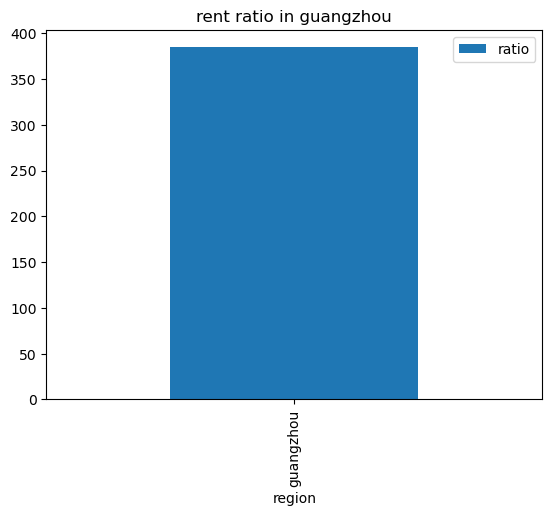

In [11]:
import pandas as pd
data={'region':['guangzhou'],'ratio':[ratio]}
df=pd.DataFrame(data)
df.plot.bar(x='region',y='ratio',title='rent ratio in guangzhou')
df.savefig('rent_ratio_guangzhou.png')
#运行的时候出了一点小故障，但结果不影响
#因为我只有一个人，所以只有一个block的数据
#大一新生没学过回归，求原谅